In [1]:
#from google.colab import files
#files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [3]:
dt_train = pd.read_csv('credit_train.csv')
dt_test  = pd.read_csv('credit_test.csv')

In [4]:
df_train = dt_train.copy()
df1_train = dt_train.copy()

In [5]:
dt_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


## Processing the data

In [6]:
dt_train.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [7]:
dt_test.isna().sum()

Loan ID                          353
Customer ID                      353
Current Loan Amount              353
Term                             353
Credit Score                    2334
Annual Income                   2334
Years in current job             780
Home Ownership                   353
Purpose                          353
Monthly Debt                     353
Years of Credit History          353
Months since last delinquent    5659
Number of Open Accounts          353
Number of Credit Problems        353
Current Credit Balance           353
Maximum Open Credit              353
Bankruptcies                     375
Tax Liens                        354
dtype: int64

In [8]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [9]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

In [10]:
dt_test.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+04,8019.000000,8.019000e+03,10000.000000,10000.000000,4694.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,9978.000000,9999.000000
mean,1.160380e+07,1077.991520,1.369106e+06,18429.671699,18.235930,34.964636,11.08410,0.165500,2.907301e+05,6.871308e+05,0.116356,0.030803
std,3.160010e+07,1477.467761,8.687557e+05,12399.956192,7.018356,21.640291,5.02338,0.500934,3.881687e+05,1.861394e+06,0.349961,0.288215
min,1.947000e+04,585.000000,8.109200e+04,0.000000,3.800000,0.000000,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.789480e+05,706.000000,8.483405e+05,10202.857500,13.600000,17.000000,7.00000,0.000000,1.086515e+05,2.706000e+05,0.000000,0.000000
50%,3.092760e+05,725.000000,1.168272e+06,16052.055000,17.000000,32.000000,10.00000,0.000000,2.075180e+05,4.626050e+05,0.000000,0.000000
75%,5.157075e+05,741.000000,1.664390e+06,23881.337500,21.700000,50.000000,14.00000,0.000000,3.624630e+05,7.861150e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.781535e+07,229057.920000,62.500000,131.000000,55.00000,10.000000,1.623744e+07,1.459073e+08,5.000000,9.000000


In [11]:
dt_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [12]:
## dropping duplicates
dt_test.duplicated().sum()

352

In [13]:
dt_test.drop_duplicates(inplace=True)

In [14]:
dt_train.duplicated().sum()

10728

In [15]:
dt_train.drop_duplicates(inplace=True)

In [16]:
dt_train.duplicated().sum()

0

In [17]:
### Caluclating the procentage of the missing values
def missing_val(df):
  mis_val = df.isnull().sum()
  mis_procentage_cal = 100 * mis_val / len(df)
  mis_val_table = pd.concat([mis_val, mis_procentage_cal], axis=1)
  mis_val_table_rem_col = mis_val_table.rename(columns={0: "Missing values", 1:"Total procentage"})
  #sorting the results
  mis_val_table_rem_col = mis_val_table_rem_col[mis_val_table_rem_col.iloc[:,1] !=0].sort_values("Total procentage", ascending=False).round(2)
  return mis_val_table_rem_col

In [18]:
## Mising values for train data
missing_val(dt_train)

,Missing values,Total procentage
Months since last delinquent,48338,53.84
Credit Score,19155,21.33
Annual Income,19155,21.33
Years in current job,3803,4.24
Bankruptcies,191,0.21
Tax Liens,10,0.01
Maximum Open Credit,3,0.00
Years of Credit History,1,0.00
Current Credit Balance,1,0.00
Number of Credit Problems,1,0.00


In [19]:
dt_train.head(20)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [20]:
### Mising values for test data
missing_val(dt_test)

,Missing values,Total procentage
Months since last delinquent,5307,53.06
Credit Score,1982,19.82
Annual Income,1982,19.82
Years in current job,428,4.28
Bankruptcies,23,0.23
Tax Liens,2,0.02
Maximum Open Credit,1,0.01
Current Credit Balance,1,0.01
Number of Credit Problems,1,0.01
Number of Open Accounts,1,0.01


In [21]:
### Remove missing values in columns
dt_train.dropna(subset=['Months since last delinquent', 'Maximum Open Credit', 'Tax Liens', 'Bankruptcies'], inplace=True)
dt_test.dropna(subset=['Months since last delinquent', 'Maximum Open Credit', 'Tax Liens', 'Bankruptcies'], inplace=True)


In [22]:
dt_train.head(20)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
14,2e841c8f-3dc1-464d-91c1-3d3d51e64c38,2ac05980-7848-4692-89ae-9321afe650f8,Fully Paid,234124.0,Short Term,727.0,693234.0,10+ years,Rent,Debt Consolidation,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0
17,24e8c8bd-d10b-4dac-8b81-1da470ff5ecb,967e8733-7189-49b7-a3ab-6a1d0e1abdac,Fully Paid,666204.0,Long Term,723.0,1821967.0,10+ years,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0
20,150ebbad-ebed-441e-b70d-2f350ad7dca6,40f729c9-54c7-4768-9fb5-2fa41d074c48,Charged Off,317108.0,Long Term,687.0,1133274.0,8 years,Rent,Debt Consolidation,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0


In [23]:
### Filing the missing data
## df_train
dt_train['Years in current job'] = dt_train['Years in current job'].fillna(dt_train['Years in current job'].mode()[0])
dt_train['Years in current job'] = dt_train['Years in current job'].str.extract(r"(\d+)")
dt_train['Years in current job'] = dt_train['Years in current job'].astype(float)
## df_test
dt_test['Years in current job'] = dt_test['Years in current job'].fillna(dt_test['Years in current job'].mode()[0])
dt_test['Years in current job'] = dt_test['Years in current job'].str.extract(r"(\d+)")
dt_test['Years in current job'] = dt_test['Years in current job'].astype(float)

In [24]:
###  Credit score has strange values
#dt_train = dt_train[dt_train['Credit Score']>851]
#dt_train.head(20)

(array([3.0544e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.1000e+01, 3.5800e+02, 1.6900e+03]),
 array([ 585. , 1277.5, 1970. , 2662.5, 3355. , 4047.5, 4740. , 5432.5,
        6125. , 6817.5, 7510. ]),
 <BarContainer object of 10 artists>)

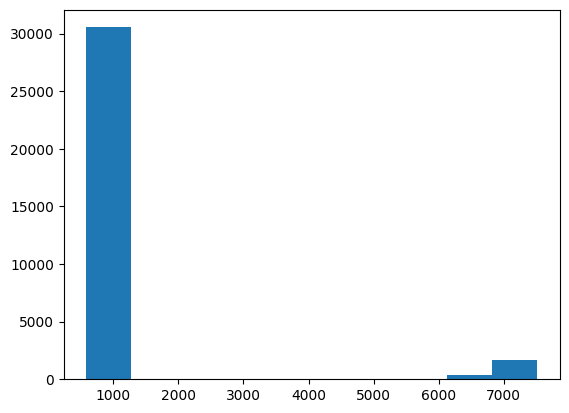

In [25]:
plt.hist(x=dt_train['Credit Score'])

In [26]:
## fixing the problem
def credit_err(val):
    credit_val = val
    credit_val['Credit Score'] = np.where(val['Credit Score'] > 851, val['Credit Score']/10, val['Credit Score'])
    return credit_val

In [27]:
dt_train.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,1.0,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2.0,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3.0,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,1.0,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
14,2e841c8f-3dc1-464d-91c1-3d3d51e64c38,2ac05980-7848-4692-89ae-9321afe650f8,Fully Paid,234124.0,Short Term,727.0,693234.0,10.0,Rent,Debt Consolidation,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0
17,24e8c8bd-d10b-4dac-8b81-1da470ff5ecb,967e8733-7189-49b7-a3ab-6a1d0e1abdac,Fully Paid,666204.0,Long Term,723.0,1821967.0,10.0,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0
20,150ebbad-ebed-441e-b70d-2f350ad7dca6,40f729c9-54c7-4768-9fb5-2fa41d074c48,Charged Off,317108.0,Long Term,687.0,1133274.0,8.0,Rent,Debt Consolidation,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0


In [28]:
###Checing again for NAs
missing_val(dt_train)

,Missing values,Total procentage
Credit Score,8644,20.95
Annual Income,8644,20.95


In [29]:
missing_val(dt_test)

,Missing values,Total procentage
Credit Score,934,19.99
Annual Income,934,19.99


In [30]:
##Filing missing data
dt_train['Credit Score'] = dt_train['Credit Score'].fillna(dt_train['Credit Score'].median())
dt_train['Annual Income'] = dt_train['Annual Income'].fillna(dt_train['Annual Income'].median())
dt_test['Credit Score'] = dt_test['Credit Score'].fillna(dt_test['Credit Score'].median())
dt_test['Annual Income'] = dt_test['Annual Income'].fillna(dt_test['Annual Income'].median())

In [31]:
## Drop unwanted columns
dt_train.drop(columns=['Loan ID', 'Customer ID'], axis=1, inplace=True)
dt_test.drop(columns=['Loan ID', 'Customer ID'], axis=1, inplace=True)

###EDA

Fully Paid     30900
Charged Off    10357
Name: Loan Status, dtype: int64

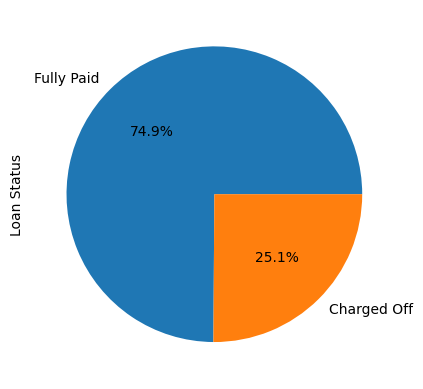

In [32]:
### Loan Status
dt_train['Loan Status'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
dt_train['Loan Status'].value_counts()

<Axes: xlabel='Term', ylabel='count'>

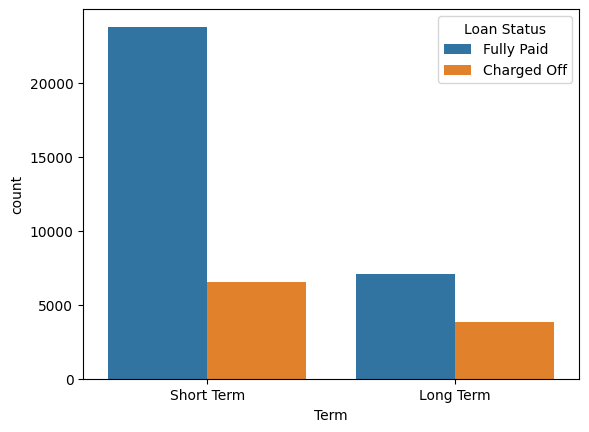

In [33]:
##Terms vs Loans
sns.countplot(x=dt_train['Term'], hue=dt_train['Loan Status'])

In [34]:
dt_train['Purpose']=dt_train['Purpose'].str.replace("other", "Other")
dt_train['Purpose'].value_counts()

Debt Consolidation      32260
Other                    3731
Home Improvements        2749
Business Loan             619
Buy a Car                 471
Medical Bills             467
Buy House                 278
Take a Trip               226
major_purchase            146
small_business            119
moving                     59
vacation                   50
wedding                    41
Educational Expenses       37
renewable_energy            4
Name: Purpose, dtype: int64

Text(0.5, 1.0, 'Loan Purpose')

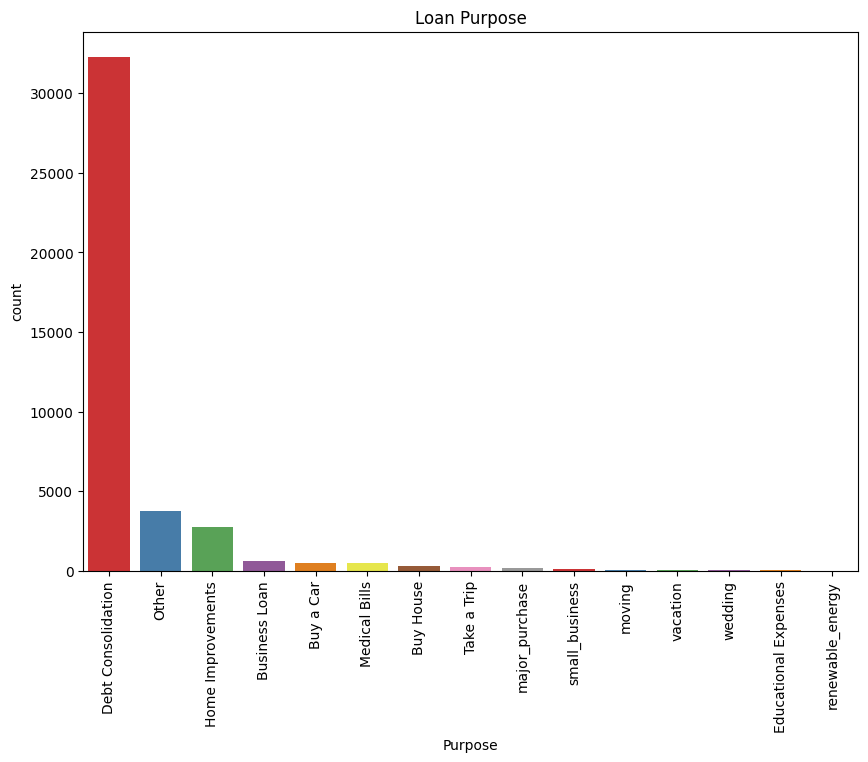

In [35]:
### Loan purpose
plt.figure(figsize=(10,7))
chart = sns.countplot(data=dt_train, x="Purpose", order=dt_train['Purpose'].value_counts().index,  palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title("Loan Purpose")

Text(0.5, 1.0, 'Home ownership')

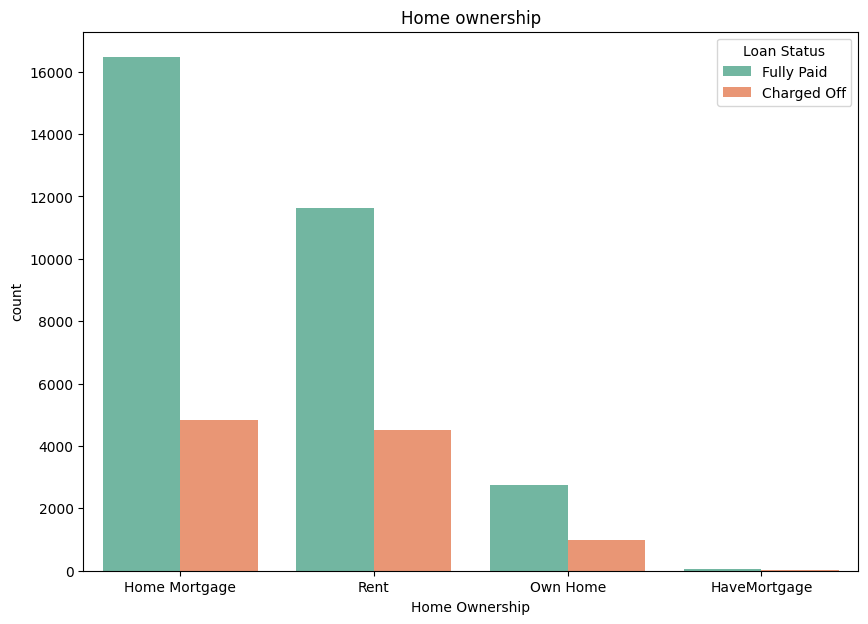

In [36]:
plt.figure(figsize=(10,7))
chart1 = sns.countplot(data=dt_train, x = "Home Ownership", order=dt_train['Home Ownership'].value_counts().index, hue="Loan Status", palette='Set2')
plt.title("Home ownership")

<ipython-input-37-396d627fd9e3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dt_train.corr(), annot=True)


<Axes: >

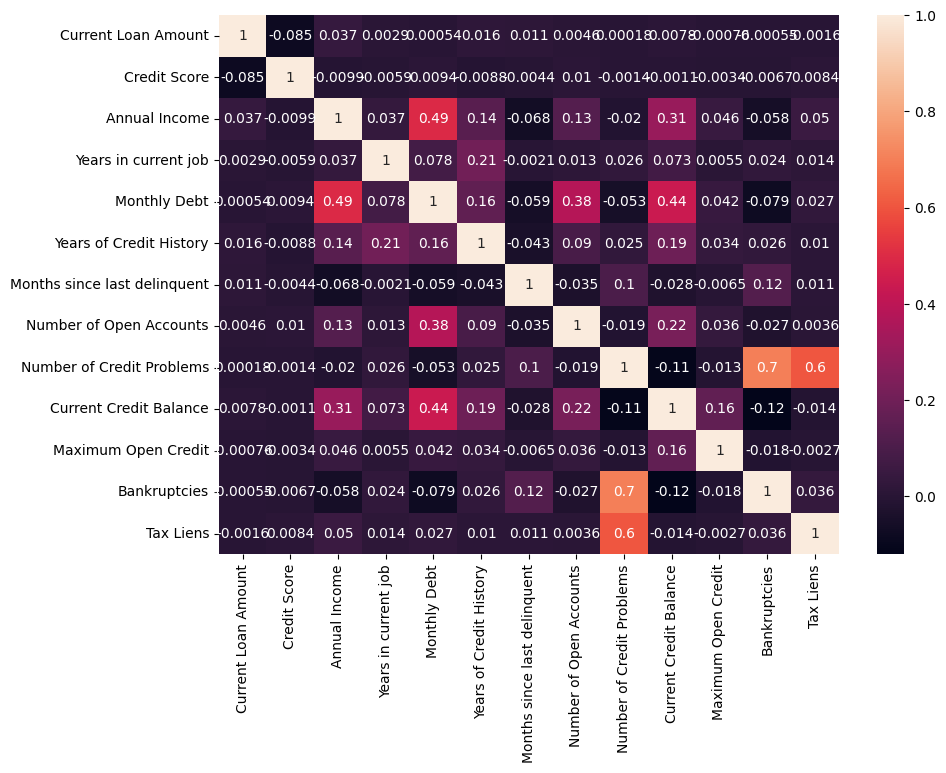

In [37]:
### Correlation matrix
plt.figure(figsize=(10,7))
sns.heatmap(dt_train.corr(), annot=True)

### Label encoding

In [38]:
#### checking columns type for categorical values
dt_test_categorical = [i for i in dt_test.columns if dt_test[i].dtype == 'O']
dt_train_categorical = [i for i in dt_train.columns if dt_train[i].dtype == 'O']

In [39]:
### Print
dt_train_categorical

['Loan Status', 'Term', 'Home Ownership', 'Purpose']

In [40]:
dt_test_categorical

['Term', 'Home Ownership', 'Purpose']

In [41]:
### Label Encoder - the categorical variable
from sklearn.preprocessing import LabelEncoder

In [42]:
##Encoding
labelEncoder = LabelEncoder()
for i in dt_train[dt_train_categorical]:
      dt_train[i]=labelEncoder.fit_transform(dt_train[i])
for i in dt_test[dt_test_categorical]:
      dt_test[i]=labelEncoder.fit_transform(dt_test[i])

In [43]:
dt_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,1,262328.0,1,725.0,1243778.0,10.0,1,3,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8.0,2,3,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,1,217646.0,1,730.0,1184194.0,1.0,1,3,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,0,648714.0,0,725.0,1243778.0,1.0,1,1,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,1,548746.0,1,678.0,2559110.0,2.0,3,3,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0


### Modeling

In [44]:
## Spliting X_train and y_train
x_train = dt_train.drop(['Loan Status'], axis=1).values
y_train = dt_train['Loan Status'].values

In [45]:
## X_test
x_test = dt_test[:]

### Scaling the data

In [46]:
from sklearn.preprocessing import RobustScaler

In [47]:
ro_scalar = RobustScaler()
X_train = ro_scalar.fit_transform(x_train)
X_test = ro_scalar.fit_transform(x_test)
X_train.shape

(41257, 16)

#### Regrations

In [48]:
### Logistic regresion
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [49]:
lr.score(X_train, y_train)

0.7991855927478974

In [50]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
### Decicion Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [52]:
clf.score(X_train, y_train)

1.0

In [53]:
clf_pred = clf.predict(X_test)
clf_pred

array([1, 1, 1, ..., 1, 1, 1])

In [54]:

### XGboot
import xgboost as xgb
clf1 = xgb.XGBClassifier (random_state = 2, learning_rate = 0.02)
clf1.fit(X_train, y_train)
clf1.score(X_train, y_train)

0.7990886395035994

In [55]:
y_predic_clf1=clf1.predict(X_test)

In [56]:
#### testting the models a bit different
from sklearn.model_selection import train_test_split
x_1 = dt_train.drop(['Loan Status'], axis=1).values
y_1 = dt_train['Loan Status'].values

In [57]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_1, y_1, test_size=0.2, random_state=123)

In [58]:
print(f'X_train: {X_train1.shape}')
print(f'X_test:  {X_test1.shape}')
print(f'y_train: {y_train1.shape}')
print(f'y_test:  {y_test1.shape}')

X_train: (33005, 16)
X_test:  (8252, 16)
y_train: (33005,)
y_test:  (8252,)


In [59]:
x_train11 = ro_scalar.fit_transform(X_train1)
x_test11 = ro_scalar.fit_transform(X_test1)

In [60]:
clf2 =xgb.XGBClassifier(random_state = 2, learning_rate = 0.05)
#clf2.fit(x_train11, y_train1)
clf2.fit(x_train11, np.ravel(y_train1))
#print(clf2.get_booster().get_score(importance_type = 'weight'))

#future importance
sorted_idx = np.argsort(clf2.feature_importances_)[::-1]
for index in sorted_idx:
    print([dt_train.columns[index], clf2.feature_importances_[index]])

['Term', 0.38049874]
['Current Loan Amount', 0.20976622]
['Loan Status', 0.15902998]
['Credit Score', 0.03708037]
['Years in current job', 0.033464987]
['Purpose', 0.020986088]
['Number of Open Accounts', 0.020104973]
['Current Credit Balance', 0.019747114]
['Home Ownership', 0.019618211]
['Monthly Debt', 0.018025514]
['Months since last delinquent', 0.017125502]
['Years of Credit History', 0.017046848]
['Number of Credit Problems', 0.015525334]
['Annual Income', 0.014204857]
['Bankruptcies', 0.011534172]
['Maximum Open Credit', 0.006241116]


In [61]:
#xgb.plot_importance(clf2, max_num_features = 15)
#plt.show()

In [62]:
clf2.score(x_train11, y_train1)

0.8026056658082109

In [63]:
y_pred_clf2 = clf2.predict(x_test11)
y_pred_clf2proba = clf2.predict_proba(x_test11)[:,1]

In [64]:
y_pred_clf2proba

array([0.8159471 , 0.8234075 , 0.7865025 , ..., 0.8332166 , 0.00402559,
       0.7080184 ], dtype=float32)

In [65]:
xgb_plt = pd.DataFrame({'Y_test': y_test1, 'Y_pred_clf2': y_pred_clf2})

In [66]:
# plt.figure(figsize=(15,7))
# plt.hist(xgb_plt[xgb_plt['Y_pred_clf2']==0], bins=10, label='Negatives')
# plt.hist(xgb_plt[xgb_plt['Y_pred_clf2']==1], bins=10, label='Positives')
# plt.xlabel('Probability of being Positive Class', fontsize=25)
# plt.ylabel('Number of records in each bucket', fontsize=25)
# plt.legend(fontsize=15)
# plt.tick_params(axis='both', labelsize=25, pad=5)
# plt.show()

In [67]:
#xgb.plot_importance(clf2, importance_type = 'weight')

[[ 432 1687]
 [   8 6125]]


0.7945952496364518

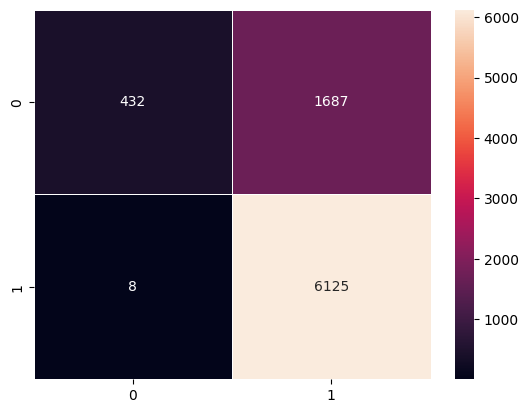

In [68]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
sns.heatmap(confusion_matrix(y_test1, y_pred_clf2), fmt='d',annot=True,  linewidth=.5)
cm = confusion_matrix(y_test1, y_pred_clf2)
print(cm)
accuracy_score(y_test1, y_pred_clf2)

In [69]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [70]:
#print(precision_recall_fscore_support(y_test1, y_pred_clf2))
label = ['Charge Off', 'Fully Paid']
print(classification_report(y_test1,y_pred_clf2,target_names=label))

              precision    recall  f1-score   support

  Charge Off       0.98      0.20      0.34      2119
  Fully Paid       0.78      1.00      0.88      6133

    accuracy                           0.79      8252
   macro avg       0.88      0.60      0.61      8252
weighted avg       0.83      0.79      0.74      8252



In [71]:
#### Testting ####

In [72]:
df_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [73]:
pd.crosstab(df_train['Home Ownership'], df_train['Loan Status'], values=df_train['Credit Score'], aggfunc='mean').round(2)

Loan Status,Charged Off,Fully Paid
Home Ownership,,
HaveMortgage,2569.21,716.89
Home Mortgage,2413.29,719.00
Own Home,2428.45,716.67
Rent,2386.21,716.83


In [74]:
### Cross validation
params = {'objective': 'binary:logistic',
'seed': 99, 'eval_metric':'auc'}
# Restructure the train data for xgboost
DTrain = xgb.DMatrix(x_train11, label =  y_train1)
# Perform cross validation
xgb.cv(params, DTrain, num_boost_round = 5, nfold=2,
early_stopping_rounds=5)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.748887,0.000938,0.734292,0.003127
1,0.759540,0.001332,0.738697,0.000608
2,0.764899,0.000404,0.743074,0.001285
3,0.769270,0.000614,0.744049,0.001536
4,0.774735,0.000378,0.746375,0.001924


In [75]:
# Import the module
from sklearn.model_selection import cross_val_score
# Create a gbt model
xg = xgb.XGBClassifier(learning_rate = 0.4, max_depth = 10)
# Use cross valudation and accuracy scores 5 consecutive times
cross_val_score(clf1, X_train, y_train, cv = 5)

array([0.79992729, 0.79483762, 0.79820628, 0.80293298, 0.79941825])

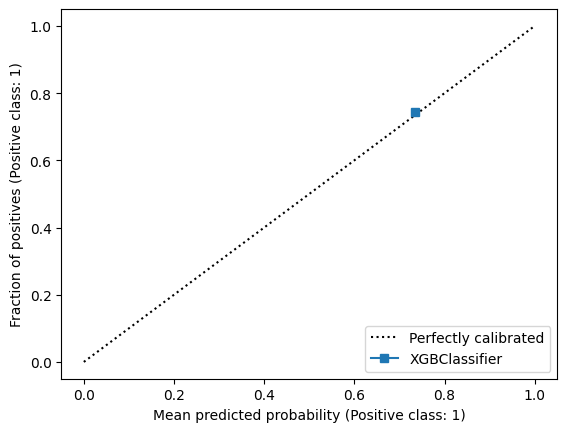

In [76]:
from sklearn.calibration import calibration_curve, CalibrationDisplay
prob_true, prob_pred = calibration_curve(y_test1, y_pred_clf2, n_bins=5)
#disp = CalibrationDisplay(prob_true, prob_pred, y_test1)
disp = CalibrationDisplay.from_estimator(clf2, X_test1, y_test1)

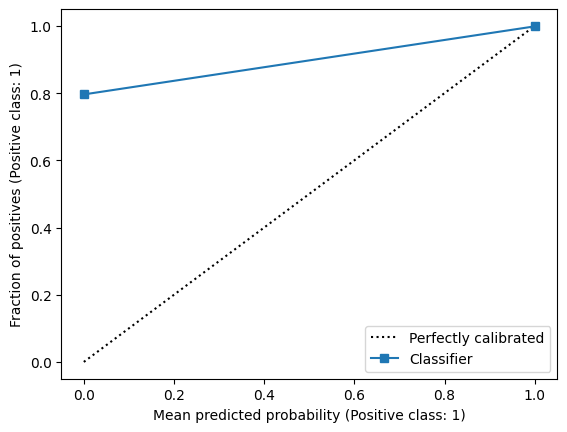

In [77]:
disp1 = CalibrationDisplay.from_predictions(y_pred_clf2, y_test1, n_bins=5)

In [78]:
#### Testing for out lairs
def DEF_outliers(data , col):
    OUT=pd.DataFrame(columns=[ "< Q1" , "> Q3" ],index=[col])

    for col_ in col:
        count_under = 0
        count_upper = 0
        outlier=data[col_]
        Q1=outlier.quantile(0.25)
        Q3=outlier.quantile(0.75)
        IQR=Q3-Q1
        underoutliers=Q1-1.5*IQR
        upperoutliers=Q3+1.5*IQR
        under_border=(outlier<underoutliers)
        upper_border=(outlier>upperoutliers)

        #print(under_border.value_counts())
        #print(upper_border.value_counts())
        OUT.loc[col_,"< Q1"] = sum(under_border)
        OUT.loc[col_,"> Q3"] = sum(upper_border)

    return OUT

In [79]:
num_col = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt','Current Credit Balance','Maximum Open Credit']

In [80]:
dt_clean = dt_train.copy()

In [81]:
dt_clean.reset_index(drop=True)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,262328.0,1,725.0,1243778.0,10.0,1,3,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
1,1,99999999.0,1,741.0,2231892.0,8.0,2,3,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
2,1,217646.0,1,730.0,1184194.0,1.0,1,3,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
3,0,648714.0,0,725.0,1243778.0,1.0,1,1,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
4,1,548746.0,1,678.0,2559110.0,2.0,3,3,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41252,1,179454.0,1,708.0,1356068.0,4.0,1,3,22318.54,22.7,21.0,25.0,0.0,387410.0,1705616.0,0.0,0.0
41253,1,99999999.0,1,742.0,1190046.0,1.0,3,7,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
41254,1,210584.0,1,719.0,783389.0,1.0,1,7,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
41255,1,99999999.0,1,732.0,1289416.0,1.0,3,3,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


In [82]:
DEF_outliers(dt_clean,num_col)

,< Q1,> Q3
Current Loan Amount,0,5104
Credit Score,2795,2069
Annual Income,1,2992
Monthly Debt,0,1407
Current Credit Balance,0,2291
Maximum Open Credit,0,2246


In [83]:
def cut(df,feature):
        q1 = df[feature].quantile(.25)
        q3 = df[feature].quantile(.75)
        iqr = q3 - q1
        df = df.loc[((q1 - 3*iqr < df[feature]) & (df[feature] < q3 + 3*iqr))]
        return df
df_without = dt_clean.copy()
for i in num_col:
        df_without = cut(df_without,i)

In [84]:
cut(df_without,'Maximum Open Credit')

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,1,262328.0,1,725.0,1243778.0,10.0,1,3,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
6,1,217646.0,1,730.0,1184194.0,1.0,1,3,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,0,648714.0,0,725.0,1243778.0,1.0,1,1,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,1,548746.0,1,678.0,2559110.0,2.0,3,3,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
14,1,234124.0,1,727.0,693234.0,10.0,3,3,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,1,431860.0,0,725.0,1243778.0,10.0,1,3,8465.07,18.5,25.0,5.0,0.0,241319.0,476806.0,0.0,0.0
99983,1,758450.0,1,726.0,1590775.0,10.0,1,3,24259.39,18.1,25.0,11.0,0.0,850820.0,1287792.0,0.0,0.0
99985,1,179454.0,1,708.0,1356068.0,4.0,1,3,22318.54,22.7,21.0,25.0,0.0,387410.0,1705616.0,0.0,0.0
99994,1,210584.0,1,719.0,783389.0,1.0,1,7,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0


In [85]:
### model spliting
x_12 = df_without.drop(['Loan Status'], axis=1).values
y_12 = df_without['Loan Status'].values

In [86]:
X_train12, X_test12, y_train12, y_test12 = train_test_split(x_12, y_12, test_size=0.2, random_state=42)

In [87]:
x_train12 = ro_scalar.fit_transform(X_train12)
x_test_12 = ro_scalar.fit_transform(X_test12)

In [88]:
### XGboost
cls4 = xgb.XGBClassifier(random_state = 42, learning_rate = 0.02)
cl = cls4.fit(x_train12, y_train12)

In [89]:
print("X_train, Y_train : ", cl.score(x_train12, y_train12).round(2))
print("X_test, Y_test: ", cl.score(x_test_12, y_test12).round(2))

X_train, Y_train :  0.76
X_test, Y_test:  0.76


In [90]:
y_pred12 = cls4.predict(x_test_12)

In [91]:
accuracy_score(y_pred12, y_test12)

0.7616242038216561

23781
7619


<Axes: title={'center': 'Count Loan Status'}>

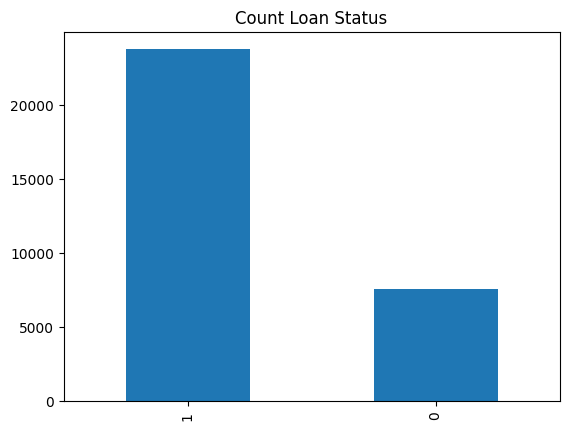

In [92]:
#### resampaling
count_class_0, count_class_1 = df_without['Loan Status'].value_counts()
print(count_class_0)
print(count_class_1)
df_without['Loan Status'].value_counts().plot(kind='bar', title="Count Loan Status")

In [93]:
df_class_0 = df_without[df_without['Loan Status'] == 1]
df_class_1 = df_without[df_without['Loan Status'] == 0]

In [94]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [95]:
print('Random over-sampling:')
print(df_test_over['Loan Status'].value_counts())

Random over-sampling:
1    23781
0    23781
Name: Loan Status, dtype: int64


In [96]:
x_123 = df_test_over.drop(['Loan Status'], axis=1).values
y_123 = df_test_over['Loan Status'].values

In [97]:
X123_train, X123_test, y123_train, y123_test = train_test_split(x_123, y_123, test_size=0.2, random_state=123)

In [98]:
x_test_123 = ro_scalar.fit_transform(X123_test)
x_train123 = ro_scalar.fit_transform(X123_train)

In [99]:
clf5 = xgb.XGBClassifier(random_state = 2, learning_rate = 0.03).fit(x_train123, y123_train)

In [100]:
clf5.score(x_train123, y123_train)

0.6791768509027832

In [101]:
clf5.score(x_test_123, y123_test)

0.6302953852622727

In [102]:
y_pred_123 = clf5.predict(x_test_123)

In [103]:
accuracy_score(y_pred_123, y123_test)

0.6302953852622727